# PyPlot

This file demonstrates how to create plots in Julia by using the PyPlot package

PyPlot relies on the matplotlib library, which is part of Python. If you have Python installed, then it will be used as is. Otherwise, see PyPlot's homepage
https://github.com/stevengj/PyPlot.jl
for instruction on how to install what is needed.

A nice collection of examples are available at
https://gist.github.com/gizmaa/7214002

Notice: Restart Julia before running this file (at least if you have used another plotting package)

In [1]:
using PyPlot
PyPlot.svg(true)         #gives prettier figures. comment out if it gives problems

true

# A First Plot

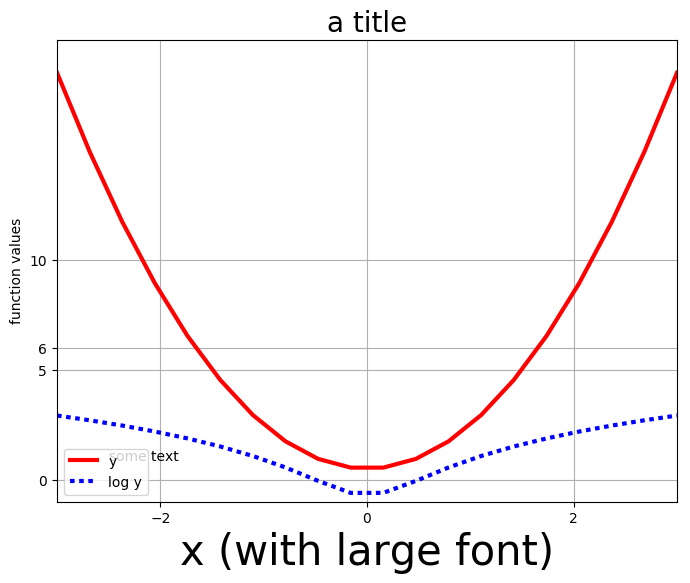

In [2]:
x = linspace(-3,3,20)                 #create some "data" to plot

y = 2*x.^2 + 0.5

figure(figsize=(8,6))
  plot(x,y,linestyle="-",color="r",linewidth=3.0)
  plot(x,log(y),linestyle=":",color="b",linewidth=3.0)
  plt[:xticks]([-2;0;2])       
  plt[:yticks]([0;5;6;10])  
  grid("on")
  title("a title",fontsize=20)
  xlim(-3,3)               # set limits of the x-axis
  ylim(-1,20)              # set limits of the y-axis
  xlabel("x (with large font)",fontsize=30)
  ylabel("function values")
  text(-2.5,0.9,"some text")
  legend(["y";"log y"])
savefig("MorePlots1.pdf")      #save pdf file of the plot
show()

# Subplots

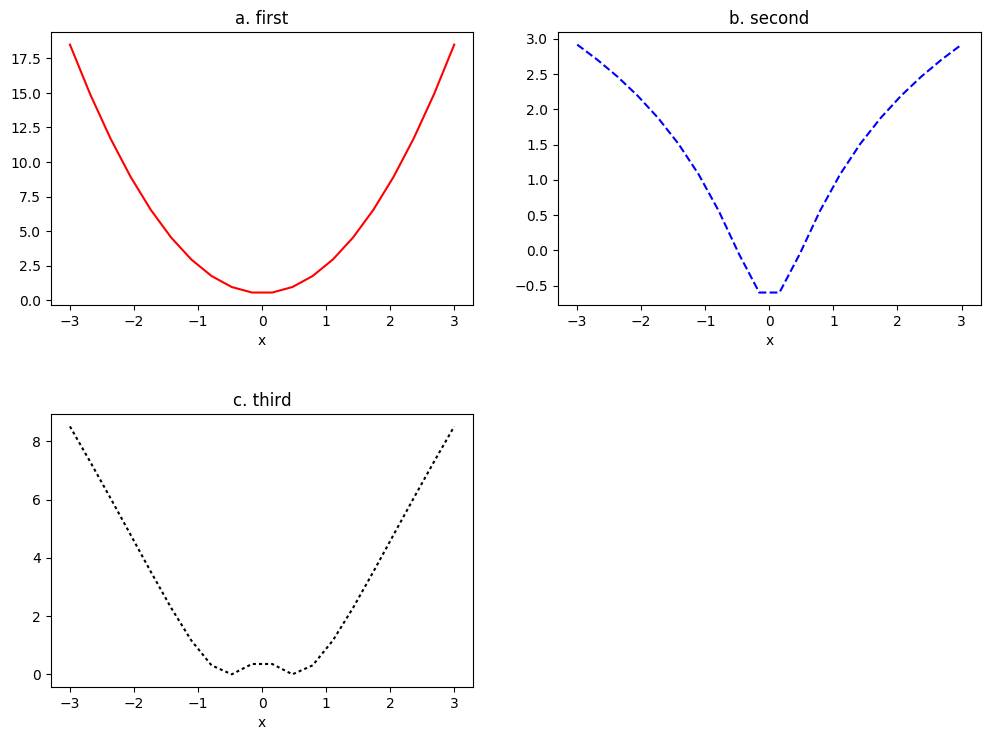

In [3]:
figure(figsize=(12,8.5))                      #subplots
subplots_adjust(hspace = 0.4)
subplot(221)
  plot(x,y,"r-")
  title("a. first")
  xlabel("x")
subplot(222)
  plot(x,log.(y),"b--")
  title("b. second")
  xlabel("x")
subplot(223)
  plot(x,log.(y).^2,"k:")
  title("c. third")
  xlabel("x")
show()

# Adding Horizontal and Vertical Lines

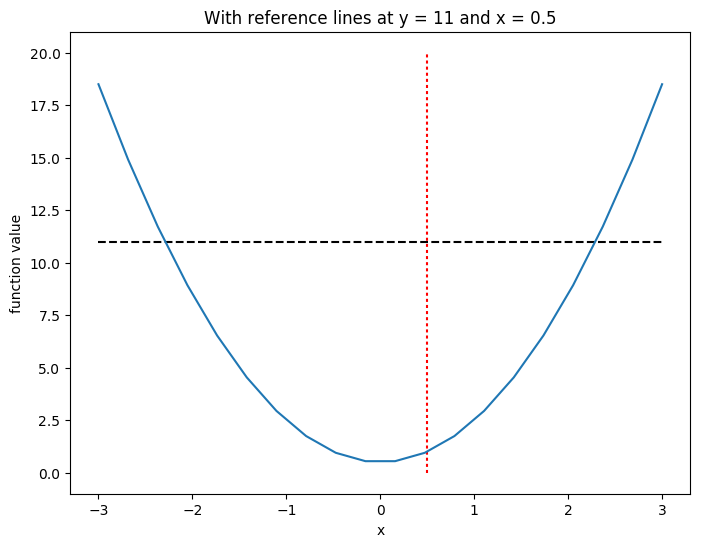

In [4]:
figure(figsize=(8,6))
  plot(x,y)
  title("With reference lines at y = 11 and x = 0.5")
  xlabel("x")
  ylabel("function value")
  hlines(11,x[1],x[end],linestyles="--",color="black")
  vlines(0.5,0,20,linestyles=":",color="r")
show()

# LaTeX in the Figure

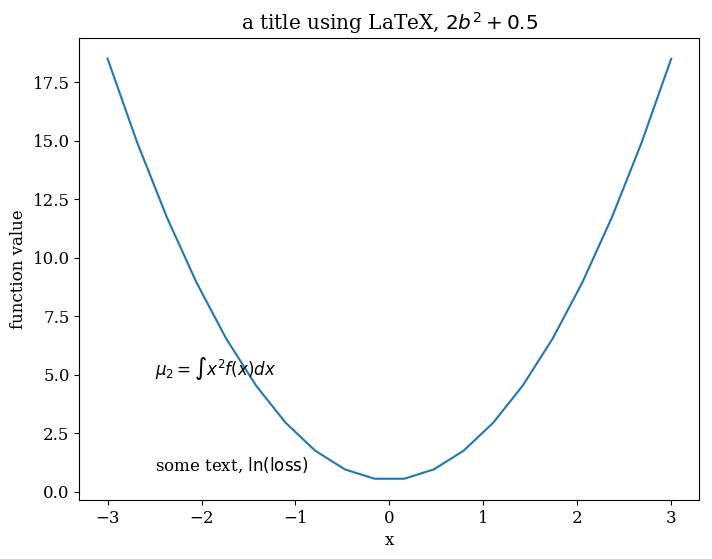

In [5]:

using LaTeXStrings                 #add some LaTeX to the figure

PyPlot.matplotlib[:rc]("font",family="serif",size=12)  #font similar to LaTeX
figure(figsize=(8,6))
  plot(x,y)
  title(L"a title using LaTeX, $2 b^2 + 0.5$")
  xlabel("x")
  ylabel("function value")
  text(-2.5,0.9,L"some text, $\ln(\mathrm{loss})$")
  text(-2.5,5,L"$\mu_2 = \int x^2 f(x) dx$")
show()

PyPlot.matplotlib[:rc]("font",family="sans-serif",size=12)  #resetting the font

# Bars, Stairs and Surface

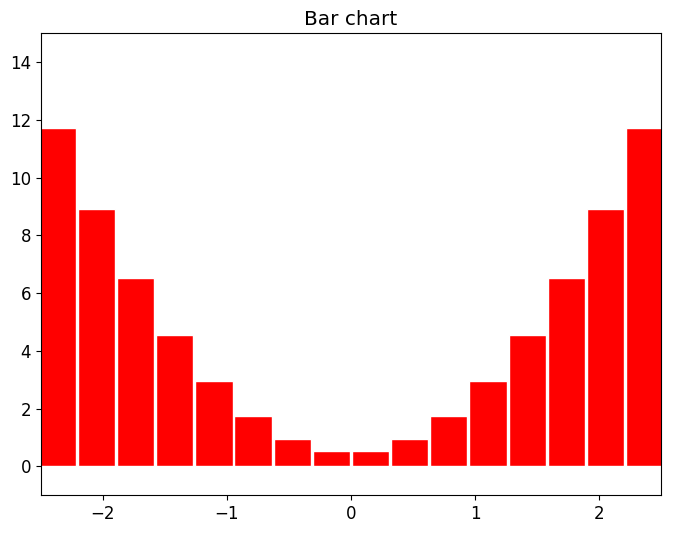

In [6]:
figure(figsize=(8,6))       
  bar(x,y,facecolor="red",edgecolor="white",align="center",width=0.3)
  xlim(-2.5,2.5)              
  ylim(-1,15)              
  title("Bar chart")
show()

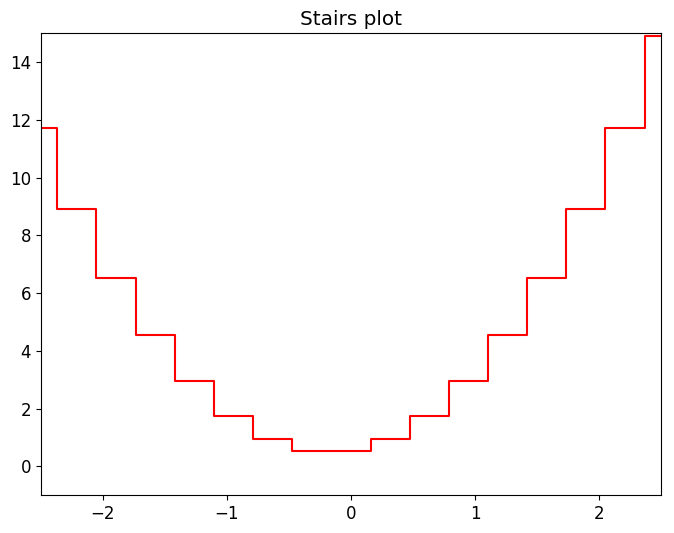

In [7]:
figure(figsize=(8,6))
  step(x,y,linewidth=1.5,color="r")
  xlim(-2.5,2.5)              
  ylim(-1,15)              
  title("Stairs plot")
show()

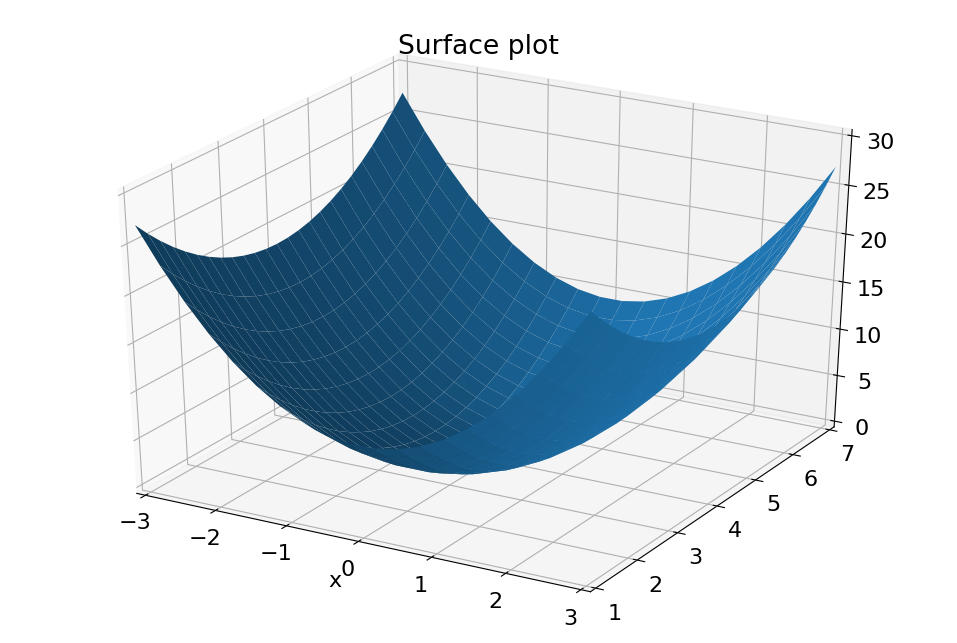

(20,)(25,)(20,25)


In [8]:
x = linspace(-3,3,20)                 #create some "data" to plot
y = linspace(1,7,25)

z = fill(NaN,(length(x),length(y)))  #to put results in, initialized as NaNs
for j = 1:length(y)                   #create z2 column by column
  z[:,j] = 2*x.^2 + (y[j]-4)^2 - 0.0*x.*(y[j]-4)
end

#notice the arguments: x,y,z'
println(size(x),size(y),size(z))

PyPlot.matplotlib[:rc]("font",size=16)
figure(figsize=(12,8))
  surf(x,y,z',rstride=1,cstride=1)    #rstride and cstride improves the look
  xlim(-3,3)                              #try other numbers
  ylim(1,7)
  zlim(0,30)
  xlabel("x")
  title("Surface plot")
show()

# Scatter and Histogram

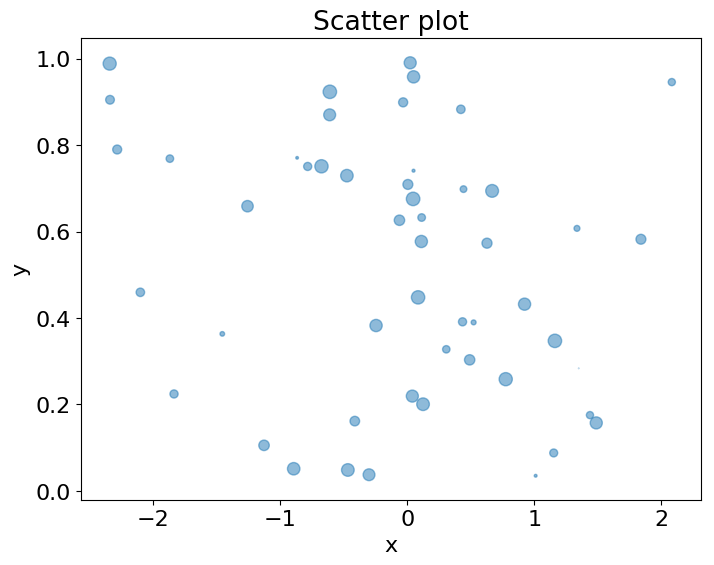

In [9]:
N = 51
x = randn(N,1)                         #SCATTER, HISTOGRAM
y = rand(N,1)
areas = rand(51)*100                   #size of the scatter points

figure(figsize=(8,6))
  scatter(x,y,s=areas,alpha=0.5)
  title("Scatter plot")
  xlabel("x")
  ylabel("y")
show()

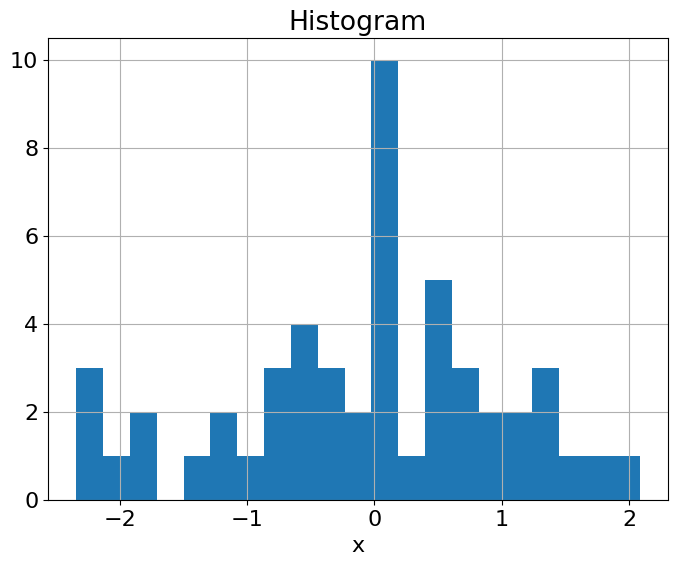

In [10]:
figure(figsize=(8,6))
  PyPlot.plt[:hist](x,21)            #long name to avoid naming conflict
  grid("on")
  title("Histogram")
  xlabel("x")
show()

# Time Series Plots

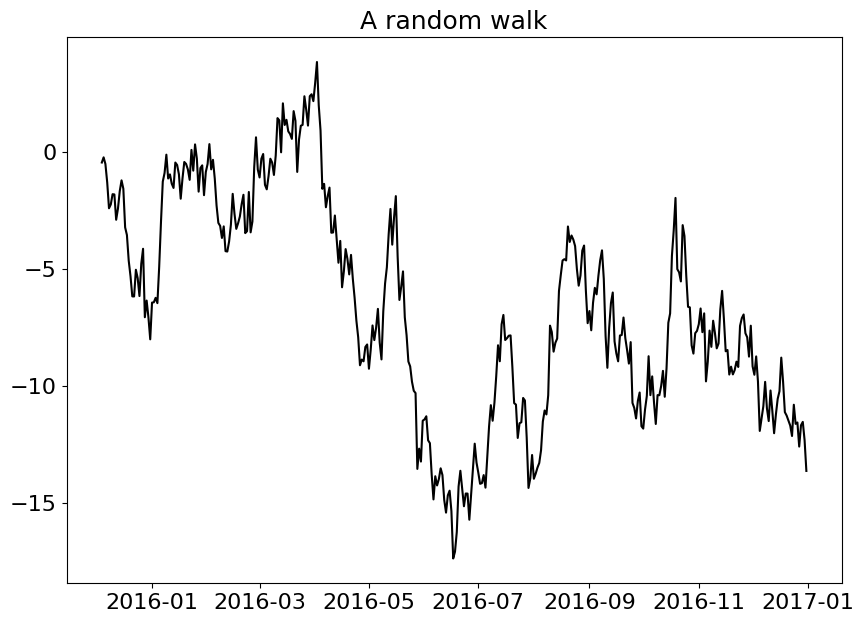

In [11]:
dN = Date(2015,12,4):Dates.Day(1):Date(2016,12,31)   #just faking some dates
dN = collect(dN)                                     #to a vector
y  = randn(length(dN),1)                             #some random numbers to plot 

figure(figsize=(10,10/1.41))          #basic time series plot
  plot_date(dN,cumsum(y),"k-")
  title("A random walk",fontsize=18)
show()

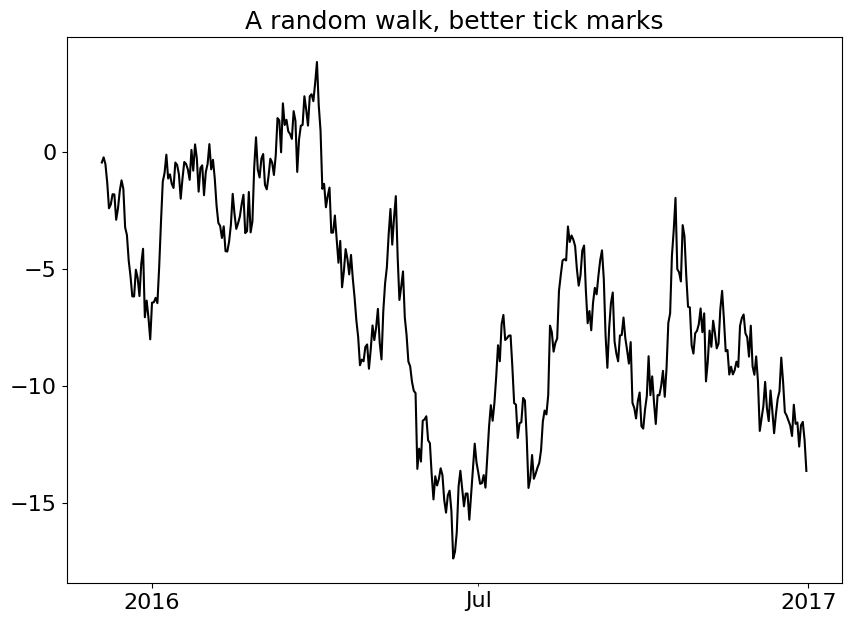

In [12]:
figure(figsize=(10,10/1.41))          #control tick marks
ax1 = axes()
  plot_date(dN,cumsum(y),"k-")
  title("A random walk, better tick marks",fontsize=18)
  majorlocator = matplotlib[:dates][:YearLocator]()
  majorformatter = matplotlib[:dates][:DateFormatter]("%Y")
  minorlocator = matplotlib[:dates][:MonthLocator](bymonth=[7],bymonthday=1,interval=1)
  minorformatter = matplotlib[:dates][:DateFormatter]("%b")
  ax1[:xaxis][:set_major_locator](majorlocator)
  ax1[:xaxis][:set_major_formatter](majorformatter)
  ax1[:xaxis][:set_minor_locator](minorlocator)
  ax1[:xaxis][:set_minor_formatter](minorformatter)
show()